# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [38]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [41]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [42]:
# Create a Beautiful Soup Object

# Scrape the website
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [43]:
# Extract all rows of data
slide_elem = soup.select_one('div.list_text')

slide_elem

table = soup.find('table', class_='table-striped')

slide_elem

all_text = soup.get_text()
print(all_text)

slide_elem





Mars Temperature Data








Mission To Mars




Mars Temperature Data
This is Mars data.


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [44]:
mars_data = {}  # Changed from mars_temps to mars_data
headers = [header.text for header in soup.find_all('th')]

table = soup.find('table', class_='table')
rows = table.find_all('tr')

for row in rows:
    data = [data.text for data in row.find_all('td')]
    
    # Check if the length of data matches the length of headers
    if len(data) == len(headers):
        # Combine headers and data into a dictionary
        mars_data_entry = {headers[i]: data[i] for i in range(len(headers))}
        mars_data[data[0]] = mars_data_entry  # Assuming the first column is unique (id)
    else:
        print("Row skipped due to mismatch in header and data length:", data)

mars_data

Row skipped due to mismatch in header and data length: []


{'2': {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 '13': {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 '24': {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 '35': {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 '46': {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 '57': {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 '68': {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min

In [46]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Convert mars_data to a DataFrame
mars_df = pd.DataFrame.from_dict(mars_data, orient='index')

# Reset the index to have a proper DataFrame structure
mars_df.reset_index(inplace=True)

# Rename the index column to something meaningful
mars_df.rename(columns={'index': 'Description'}, inplace=True)

#Explanation:
#pd.DataFrame.from_dict(mars_data, orient='index'): This creates a DataFrame where the keys of the mars_data dictionary become the index of the DataFrame.
#reset_index(): This resets the index of the DataFrame, converting the index into a column.
#rename(columns={'index': 'Description'}): This renames the index column to "Description" or whatever name you find suitable.

In [47]:
# Confirm DataFrame was created successfully
mars_df

,Description,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2,2012-08-16,10,155,6,-75.0,739.0
1,13,13,2012-08-17,11,156,6,-76.0,740.0
2,24,24,2012-08-18,12,156,6,-76.0,741.0
3,35,35,2012-08-19,13,157,6,-74.0,732.0
4,46,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...,...
1862,1889,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [48]:
# Examine data type of each column
mars_df.dtypes

Description         object
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [49]:
# Change data types for data analysis

# Correctly convert 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Now you can change the other column types as well
mars_df = mars_df.astype({
    'sol': 'int',
    'ls': 'int',
    'month': 'int',
    'min_temp': 'float',
    'pressure': 'float'
})


In [50]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

Description                 object
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [51]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].nunique()
unique_months

12

In [52]:
# 2. How many sols (Martian days) worth of data are there?
unique_sol = mars_df['sol'].nunique()
unique_sol

1867

In [53]:
# 3. What is the average minimum temperature by month?
average_temperature= mars_df.groupby('month')['min_temp'].mean()
average_temperature

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

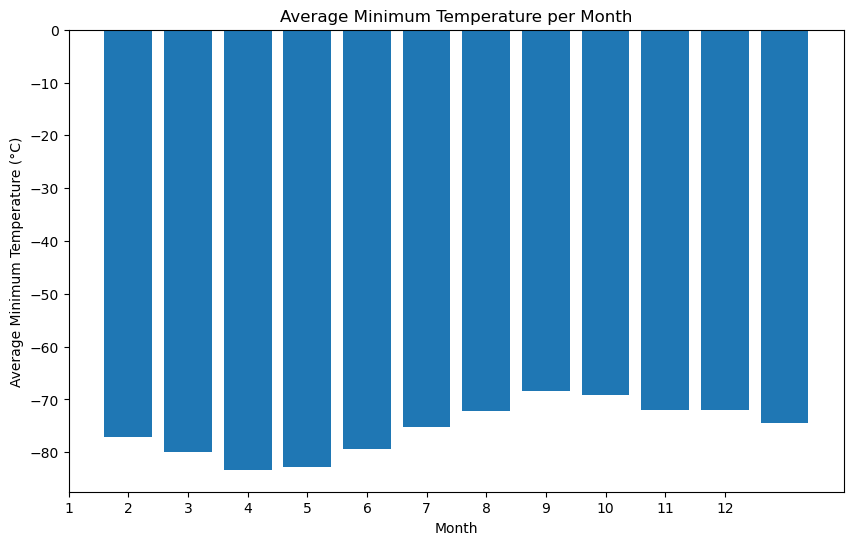

In [97]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_temperature.index, average_temperature.values)
plt.xticks(ticks=range(len(average_temperature.index)), labels=average_temperature.index)

# labels and title
plt.title('Average Minimum Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Show the plot
plt.show()

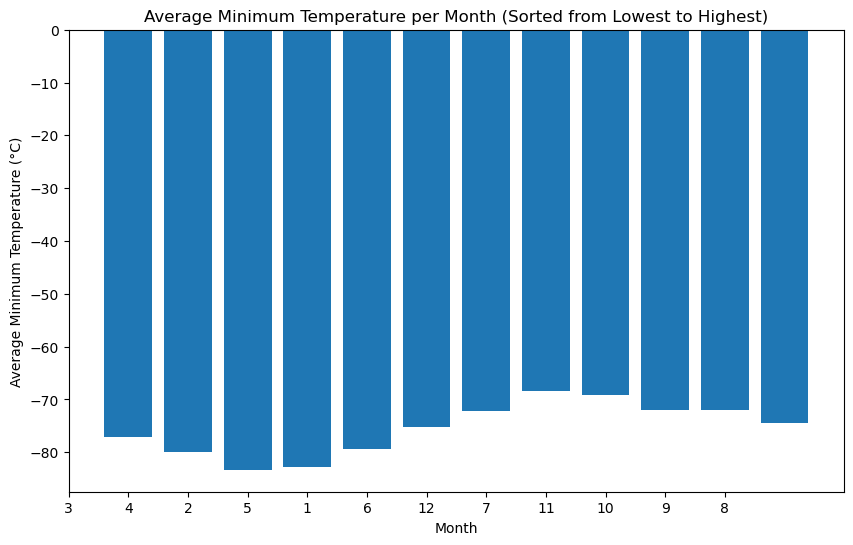

In [99]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average temperatures from lowest to highest
sorted_average_temperature = average_temperature.sort_values()

# Plotting the sorted bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_average_temperature.index, sorted_average_temperature.values)
plt.xticks(ticks=range(len(sorted_average_temperature.index)), labels=sorted_average_temperature.index)

# Adding labels and title
plt.title('Average Minimum Temperature per Month (Sorted from Lowest to Highest)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')

# Show the plot
plt.show()

In [57]:
# 4. What is the average pressure by month?
average_pressure= mars_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

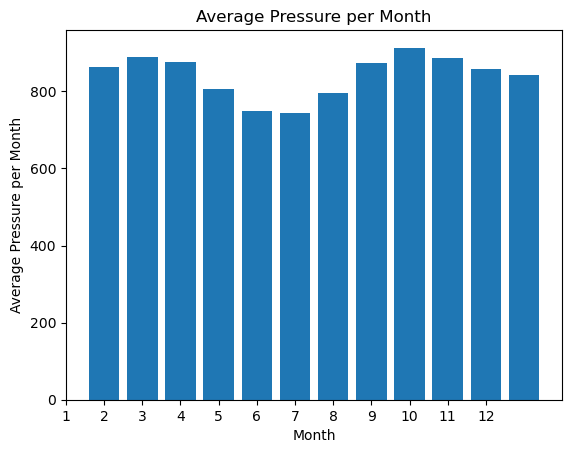

In [100]:
# Plot the average pressure by month
plt.bar(average_pressure.index, average_pressure.values)
plt.xticks(ticks=range(len(average_pressure.index)), labels=average_pressure.index)

# labels and title
plt.title('Average Pressure per Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure per Month')

# Show the plot
plt.show()


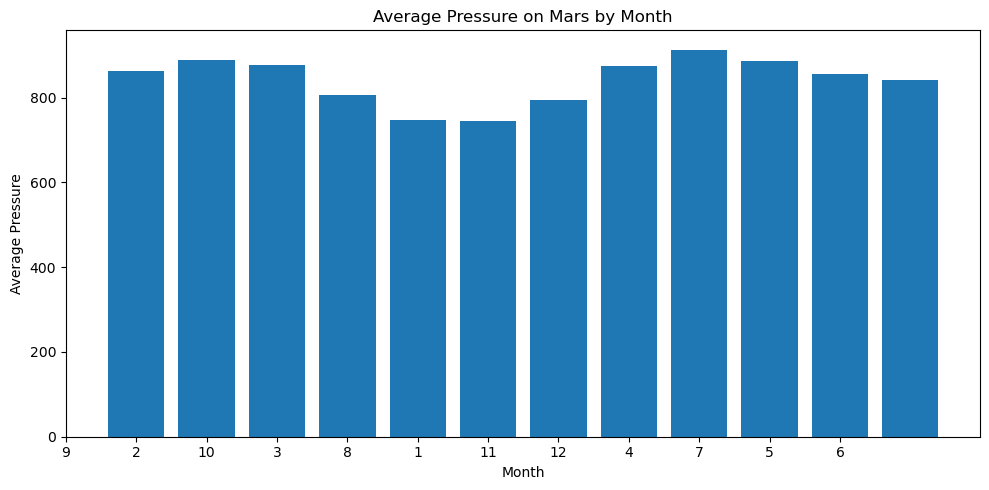

In [92]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

average_pressure= mars_df.groupby('month')['pressure'].mean()
average_pressure_sorted = average_pressure.sort_values(ascending=False)

plt.figure(figsize=(10, 5))  # Set the figure size first
plt.bar(average_pressure_sorted.index, average_pressure_sorted.values)

# Set x-ticks to show all x values
plt.xticks(ticks=range(len(average_pressure_sorted.index)), labels=average_pressure_sorted.index)  # Rotate for better readability if needed

# Add labels and title for clarity
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure on Mars by Month')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

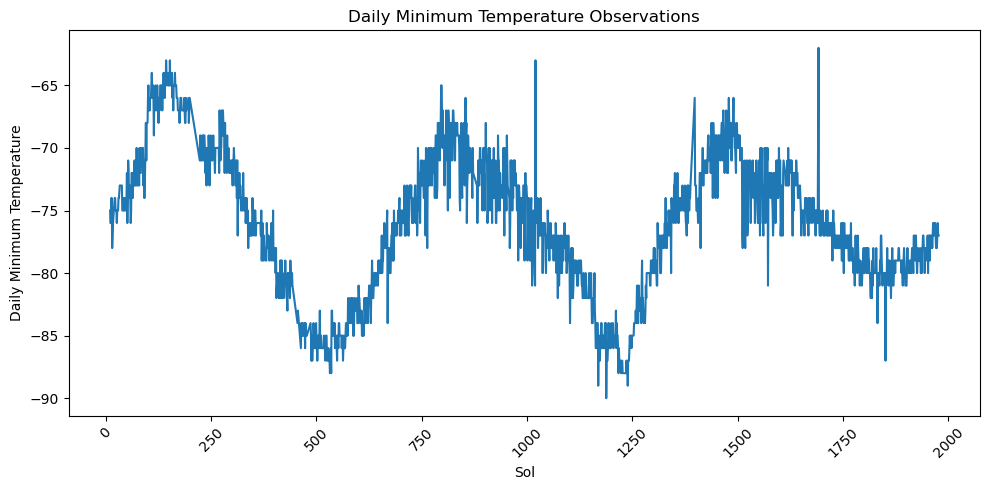

In [102]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

daily_min_temp = mars_df.groupby('sol')['min_temp'].min()

plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(daily_min_temp.index, daily_min_temp.values, linestyle='-')

# Add labels and title
plt.xlabel('Sol')
plt.ylabel('Daily Minimum Temperature')
plt.title('Daily Minimum Temperature Observations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


#### Minimum Temperature

The coldest temperatures were registered in January and May. The least cold in September and october. A clear temperature cycle has been observed

#### Atmospheric Pressure

The Highest pressures were found in a earth autaum and winter. We can see that the lowest pressures were found in June and Julye. The pressure behaviour is also seen to be cyclical

#### Year Length

We can observe clear cycles in the data. There are 2000 days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [103]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv", index=False, header=True)

In [104]:
browser.quit()